In [2]:
from google.colab import drive
drive.mount('/content/drive')
!cp '/content/drive/MyDrive/COVID-19_Radiography_Dataset.zip' .
!unzip -q -n COVID-19_Radiography_Dataset.zip
data_dir ='/content/COVID-19_Radiography_Dataset'



Mounted at /content/drive


ΚΑΤΗΓΟΡΙΕΣ: ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
ΣΥΝΟΛΟ ΕΙΚΟΝΩΝ: 21165
Index 18591, Label: 2 (Normal)
Index 18714, Label: 2 (Normal)
Index 4524, Label: 1 (Lung_Opacity)
Index 11026, Label: 2 (Normal)
Index 8689, Label: 1 (Lung_Opacity)
Index 5314, Label: 1 (Lung_Opacity)
Index 10453, Label: 2 (Normal)
Index 6828, Label: 1 (Lung_Opacity)
Index 628, Label: 0 (COVID)
Index 16693, Label: 2 (Normal)
Index 4576, Label: 1 (Lung_Opacity)
Index 16446, Label: 2 (Normal)
Index 9677, Label: 2 (Normal)
Index 9328, Label: 1 (Lung_Opacity)
Index 18919, Label: 2 (Normal)
Index 8225, Label: 1 (Lung_Opacity)
Index 9390, Label: 1 (Lung_Opacity)
Index 14958, Label: 2 (Normal)
Index 9581, Label: 1 (Lung_Opacity)
Index 8012, Label: 1 (Lung_Opacity)
Index 4247, Label: 1 (Lung_Opacity)
Index 1860, Label: 0 (COVID)
Index 2455, Label: 0 (COVID)
Index 15116, Label: 2 (Normal)
Index 17933, Label: 2 (Normal)


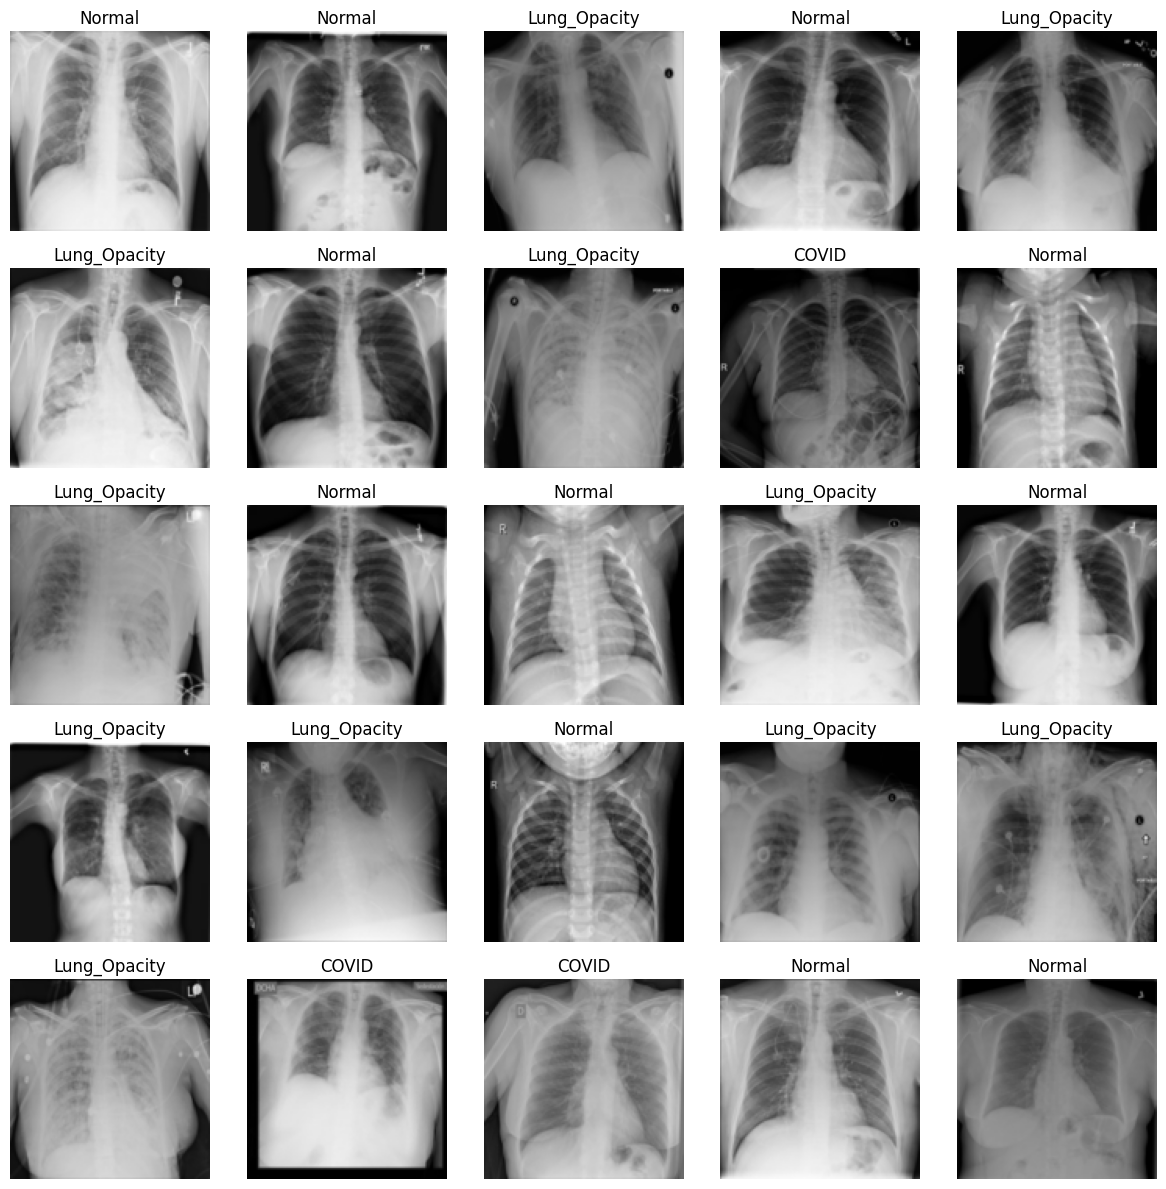

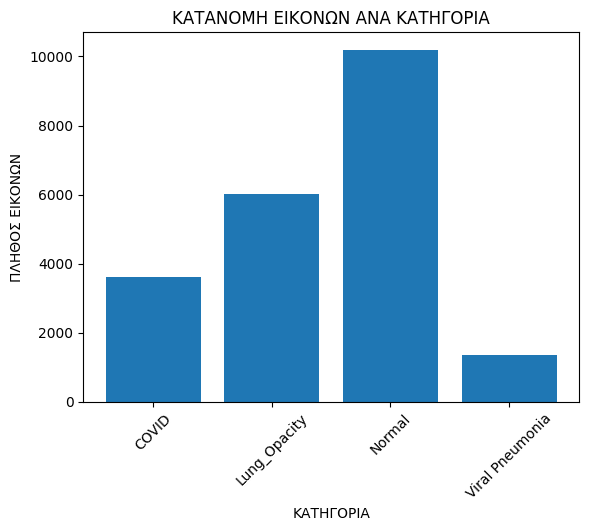

In [3]:

#2.1 Κλάση COVID19Dataset
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset
from collections import Counter

class COVID19Dataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """Αρχικοποίηση του dataset με τον δοσμένο κατάλογο root."""
        self.root_dir = root_dir #αποοθηκευουμε τη διαδρομή του ριζικού φακέλου
        self.transform = transform #αποθηκευει τους μετασχηματισμους που γινονται στισ εικόνες αν δοθουν
        self.data = [] #Αρχικοποιείται ως κενή λίστα και θα γεμίσει με ζεύγη δηλάδη με το path και την ετικετα ποθ αντιστοιχει στην κατηγορία της εικόνας
        self.classes = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']

        # Συλλογή δεδομένων και κατηγοριών
        for idx, class_name in enumerate(self.classes): # επαναλαμβανει για καθεκατηγορια (covid//Ιογενής πνευμονία//φυσιολογική//Πνευμονικές αδιαφάνειες)
            class_dir = os.path.join(root_dir, class_name) #δημιουργια της διαδρομής του φακέλου ανάλογα με την κατηγορία
            if os.path.isdir(class_dir): #Ελέγχει αν υπάρχει ο φάκελος για την κατηγορία
                for file_name in os.listdir(class_dir): #επανάληψη για καθε αρχειο στον φαάκελο
                    file_path = os.path.join(class_dir, file_name)#δημιουργία  path
                    if file_name.endswith('.png') or file_name.endswith('.jpg'):# Ελέγχει αν το αρχείο είναι εικόνα (.png ή .jpg).
                        self.data.append((file_path, idx)) #Προσθέτει στη λίστα self.data ένα ζεύγος με το path και τον αριθμό της κατηγορίας

        # Έλεγχος για τις ετικέτες//debugging
        print("ΚΑΤΗΓΟΡΙΕΣ:", self.classes)
        print("ΣΥΝΟΛΟ ΕΙΚΟΝΩΝ:", len(self.data))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]

        # Έλεγχος εγκυρότητας της ετικέτας
        if label >= len(self.classes):
            raise ValueError(f"Label {label} is out of range for classes. Total classes: {len(self.classes)}")

        # Άνοιγμα εικόνας και μετατροπή της σε RGB
        image = Image.open(img_path).convert("RGB")

        # Εφαρμογή μετασχηματισμών αν υπάρχουν
        if self.transform:
            image = self.transform(image)

        return image, label #επιστρεφουμε το ζεύγος

    def display_batch(self, indexes):
        """Εμφανίζει ένα batch από εικόνες δεδομένων με τις αντίστοιχες ετικέτες τουσ"""
        fig, axes = plt.subplots(5, 5, figsize=(12, 12)) #δημιουργουμε εναν πίνακα από 5 × 5 υποπλαίσια δηκ 25

        for ax, idx in zip(axes.flatten(), indexes): #Συνδυάζει κάθε υποπλαίσιο (άξονα ax) με idx από τη λίστα indexes
            img, label = self.__getitem__(idx)

            # Εκτύπωση της ετικέτας για λ'ογους debugging
            print(f"Index {idx}, Label: {label} ({self.classes[label]})")

            ax.imshow(transforms.ToPILImage()(img))   #Εμφανίζει την εικόνα στο τρέχον υποπλαίσιο και  μετατρέπεται σε μορφή PIL με την χρήση της  transforms.ToPILImage()
            ax.set_title(self.classes[label]) # Ορίζει ως τίτλο του υποπλαισίου του ονοματος της κλάσης που αντιστοιχεί στην συγκεκριμένη ετικέτα
            ax.axis("off")

        # Αν περισσεύουν κενά υποπλαίσια, απενεργοποιήστε τα
        for ax in axes.flatten()[len(indexes):]:
            ax.axis("off")

        plt.tight_layout()  #Προσαρμόζει αυτόματα την απόσταση ανάμεσα στα υποπλαίσια ώστε να μην επικαλύπτονται για μια καθάρη εικόνα
        plt.show()

# Ορισμός των μετασχηματισμών για την επεξεργασία των εικόνων
transformation = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Δημιουργία του αντικειμένου του dataset
path = '/content/COVID19Dataset'


DATASET = COVID19Dataset(root_dir=path, transform=transformation)

# Δημιουργία λίστας με 25 τυχαία indexes
randomindx= random.sample(range(len(DATASET)), 25) #χεησιμοποιούμε την  random.sample για να δημιουργηθεί μια λίστα με 25 τυχαίους  indexes από το dataset

# Παρουσίαση 25 τυχαίων εικόνων
DATASET.display_batch(randomindx)

# Υπολογισμός του πλήθους των εικόνων ανά κλάση
classsum = Counter(label for _, label in DATASET.data)# Χρησιμοποιουμε την  Counter από το module collections για να μετρηθεί το πλήθος των εικόνων σε κάθε κατηγορία

# Δημιουργία ραβδογράμματος για την κατανομή των εικόνων ανά κατηγορία
plt.bar(DATASET.classes, [classsum[i] for i in range(len(DATASET.classes))])
plt.xlabel("ΚΑΤΗΓΟΡΙΑ")
plt.ylabel("ΠΛΗΘΟΣ ΕΙΚΟΝΩΝ")
plt.title("ΚΑΤΑΝΟΜΗ ΕΙΚΟΝΩΝ ΑΝΑ ΚΑΤΗΓΟΡΙΑ")
plt.xticks(rotation=45)
plt.show()



In [ ]:
#3 Συναρτήσεις εκπαίδευσης και δοκιμής

import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from collections import Counter

def confusion_matrix(y, y_pred, num_classes):

    cmatrix = torch.zeros(num_classes, num_classes, dtype=torch.int64)#δημιουργούμε έναν πίνακα cm  με μηδενικά,
    for t, p in zip(y.view(-1), y_pred.view(-1)): #Το zip(y, y_pred) δημιουργεί ζευγάρια όπου:  t είναι η πραγματική κλάση p είναι η προβλεπόμενη κλάση από το μοντελο μας//με view(-1) μετατρεπουμε μετατρέπει τα tensors σε μονοδιάστατους πίνακες
        cmatrix[t.long(), p.long()] += 1 #Μετατρέπουμε τις τιμές t και p σε τύπο long// cm[t,p]+=1 αυξάνουμε κατά 1 την αντίστοιχη θέση του πίνακα
    return cmatrix
def train_one_epoch(model, dataloader, optimizer, loss_fn, device):

    model.train()
    running_loss = 0.0  # Συνολική απώλεια για όλα τα batches
    correct = 0         # Συνολικός αριθμός σωστών προβλέψεων
    total = 0           # Συνολικός αριθμός δειγμάτων

    for batch in dataloader:
        images, labels = batch
        images, labels = images.to(device), labels.to(device)

        # Μηδενισμός των gradients
        optimizer.zero_grad()

        # Εμπρόσθια διάδοση
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Οπισθόδρομη διάδοση και ενημέρωση βαρών
        loss.backward()
        optimizer.step()

        # Ενημέρωση συνολικής απώλειας
        running_loss += loss.item() * images.size(0)

        # Υπολογισμός σωστών προβλέψεων
        _, predicted = torch.max(outputs, 1)  # Λήψη της κατηγορίας με τη μέγιστη πιθανότητα
        correct += (predicted == labels).sum().item()  # Σύγκριση με πραγματικές ετικέτες
        total += labels.size(0)  # Ενημέρωση συνολικού αριθμού δειγμάτων

    # Υπολογισμός μέσης απώλειας και ακρίβειας
    avg_loss = running_loss / len(dataloader.dataset)
    accuracy = correct / total

    return avg_loss, accuracy #Υπολογίζουμε τη μέση απώλεια διαιρώντας τη συνολική απώλεια running_loss με τον αριθμό των batches (len(dataloader))

def test(model, dataloader, loss_fn, device, num_classes):

    model.eval()# απενεργοποιουμε  layers  που χρησιμοποιούνται μόνο κατά την εκπαίδευση


#αρχικοποιίηση μεταβλητών
    running_loss = 0.0
    correct = 0 #Κρατά τον αριθμό των σωστών προβλέψεων
    total = 0 # Κρατά το συνολικό αριθμό δειγμάτων
    #Αποθηκεύουμε τις πραγματικές και τις προβλεπόμενες ετικέτες όλων των δειγμάτων
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for batch in dataloader: #οdataloader παρέχει τα δεδομένα σε batches επομένως κανουμε επανάληψη για κάθε batches
            images, labels = batch
            images, labels = images.to(device), labels.to(device)

            # Εμπρόσθια διάδοση
            outputs = model(images) # Οι εικόνες περνούν μέσα από το μοντέλο (model) και παράγονται οι προβλέψεις
            #Υπολογίζεται η απώλεια για το συγκεκριμένο batch και προστίθεται στο running_loss
            loss = loss_fn(outputs, labels)
            running_loss += loss.item()

            # Πρόβλεψη ετικετών
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item() #Ελέγχουμε πόσες προβλέψεις είναι σωστές (preds == labels) και τιε προσθέτουμε στο correct
            total += labels.size(0)
            #Αποθηκεύουμε τις πραγματικές  και τις προβλεπόμενες ετικέτες
            all_labels.append(labels)
            all_preds.append(preds)

    # Υπολογισμός πίνακα σύγχυσης
    all_labels = torch.cat(all_labels)
    all_preds = torch.cat(all_preds)
    cm = confusion_matrix(all_labels, all_preds, num_classes)
    #την τιμή της συνάρτησης απώλειας, την ευστοχία και τον πίνακα σύγχυσης του μοντέλου στο σύνολο δεδομένων που αντιστοιχεί ο DataLoade
    accuracy = correct / total
    return running_loss / len(dataloader), accuracy, cm


ΚΑΤΗΓΟΡΙΕΣ: ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
ΣΥΝΟΛΟ ΕΙΚΟΝΩΝ: 21165
Epoch 1/20
Train Loss: 1.1294, Train Accuracy: 50.17%
Val Loss: 1.0086, Val Accuracy: 58.49%
Confusion Matrix:
tensor([[   3,  169,  519,    0],
        [   2,  647,  555,    1],
        [   0,  210, 1826,    0],
        [   1,  117,  183,    0]])
Epoch 2/20
Train Loss: 0.9279, Train Accuracy: 61.91%
Val Loss: 0.8835, Val Accuracy: 63.31%
Confusion Matrix:
tensor([[   4,  163,  522,    2],
        [   7,  744,  446,    8],
        [   1,  186, 1794,   55],
        [   2,   59,  102,  138]])
Epoch 3/20
Train Loss: 0.8510, Train Accuracy: 65.17%
Val Loss: 0.8374, Val Accuracy: 65.37%
Confusion Matrix:
tensor([[  24,  194,  471,    2],
        [  18,  822,  355,   10],
        [   7,  205, 1754,   70],
        [   1,   48,   85,  167]])
Epoch 4/20
Train Loss: 0.8118, Train Accuracy: 67.03%
Val Loss: 0.8090, Val Accuracy: 66.90%
Confusion Matrix:
tensor([[  71,  188,  430,    2],
        [  36,  857,  

<ipython-input-5-6f9ebad073aa>:119: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("bestmodel.pth"))



Final Test Results:
Test Loss: 0.6387, Test Accuracy: 75.67%
Confusion Matrix:
tensor([[ 374,  122,  239,    3],
        [  96,  891,  207,   10],
        [ 110,  147, 1746,   36],
        [   8,   25,   27,  192]])


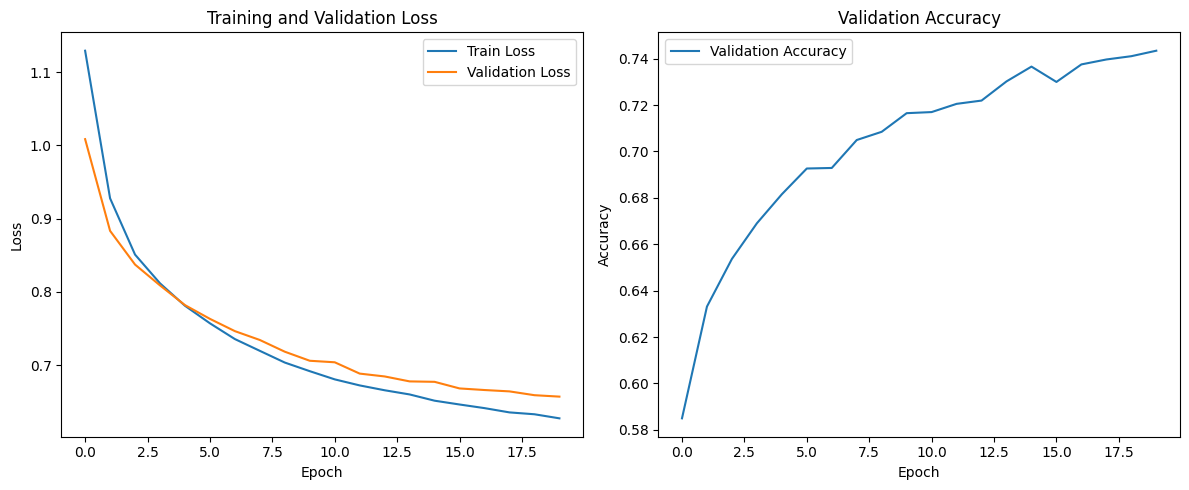

In [ ]:
#4 Απλό συνελικτικό δίκτυο CNN1


import torch
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
#from COVID19Dataset import COVID19Dataset
#from ex2 import train_one_epoch, test  # Εισαγωγή έτοιμων συναρτήσεων


# Model definition
class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()

        # Συνελικτικά επίπεδα
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3)  # 8 φίλτρα 3x3 ΠΡΩΤΟ ΕΠΙΠΕΔΟ
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3) # 16 φίλτρα 3x3 ΔΕΥΤΕΡΟ ΕΠΙΠΕΔΟ

        # Επίπεδα ενεργοποίησης
        self.relu = nn.ReLU() # συνάρτηση ενεργοποίησης ReLU

        # Επίπεδα συγκέντρωσης (max pooling)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) #Εφαρμόζει ένα παράθυρο 2×2 kernel size

        # Placeholder για δυναμικό υπολογισμό in_features
        self.fc1 = None # αρχικοποιούμε αρχικά ως None επειδή θα το υπολογίσουμε  έπειτα στο forward()
        self.fc2 = nn.Linear(32, 4)  # To δεύτερο fully connected παραμένει σταθερό//4 εξόδους  για κάθε κατηγορία ταξινόμησης

    def forward(self, x):
        # Επίπεδο 1: Conv + ReLU + Pooling
        x = self.conv1(x)    # Conv1
        x = self.relu(x)     # ReLU1
        x = self.pool(x)     # Pooling1

        # Επίπεδο 2: Conv + ReLU + Pooling
        x = self.conv2(x)    # Conv2
        x = self.relu(x)     # ReLU2
        x = self.pool(x)     # Pooling2

        # Επίπεδο μετατροπής σε 1 διάσταση
        x = x.view(x.size(0), -1)  # Flatten

        # Υπολογισμός του fully connected μόνο την πρώτη φορά
        if self.fc1 is None:
            in_features = x.size(1)
            self.fc1 = nn.Linear(in_features, 32).to(x.device)  # Δυναμική δημιουργία του fc1

        # Πλήρως συνδεδεμένα επίπεδα
        x = self.fc1(x)      # Fully Connected 1
        x = self.relu(x)     # ReLU3
        x = self.fc2(x)      # Fully Connected 2
        return x


# Μετασχηματισμοί εικόνων
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Μετατροπή σε grayscale (1 κανάλι )
    transforms.Resize((28, 28)),                 # Αλλαγή μεγέθους σε 28x28
    transforms.ToTensor(),                       # Μετατροπή σε tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Κανονικοποίηση (0, 1)
])

# Δημιουργία αντικειμένου COVID19Dataset
data = COVID19Dataset(root_dir='/content/COVID19Dataset', transform=transform)

# Διαχωρισμός σε σύνολα εκπαίδευσης, επικύρωσης και δοκιμής
generator = torch.Generator().manual_seed(42)#τυχαίοσ αριθμός αρχικοποίησηςγια αναπαραγωγή των αποτελεσμάτων
train_ds, val_ds, test_ds = random_split(data, [0.6, 0.2, 0.2], generator=generator)# 60% για εκπαίδευση (train)//20% για επικύρωση (val)//20% για δοκιμή (test)

# Δημιουργία DataLoaders
trainloader = DataLoader(train_ds, batch_size=64, shuffle=True)

#για επικύρωση και δοκιμή διατηρoύμε  τη σειρά των δεδομένων αρα shuffle=False
valloader = DataLoader(val_ds, batch_size=64, shuffle=False)
testloader = DataLoader(test_ds, batch_size=32, shuffle=False)

# Ρυθμίσεις συσκευής
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Αρχικοποίηση του μοντέλου, του optimizer και της συνάρτησης απώλειας
model = CNN1().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.99))  # με β1=0.9, β2=0.99
lossfn = nn.CrossEntropyLoss()
 #Εκπαίδευση με early stopping και αποθήκευση του καλύτερου μοντέλου
num_epochs = 20
num_classes = 4#4 κατηγορίες
best_val_loss = float('inf')
early_stop_counter = 0
train_losses, val_losses, val_accuracies = [], [], []

for epoch in range(num_epochs):
    train_loss, train_accuracy = train_one_epoch(model, trainloader, optimizer, lossfn, device)
    val_loss, val_accuracy, val_cm = test(model, valloader, lossfn, device, num_classes)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy * 100:.2f}%")
    print(f"Confusion Matrix:\n{val_cm}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "bestmodel.pth")
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= 5:
            print("Early stopping ")
            break

# Φόρτωση του καλύτερου μοντέλου
model.load_state_dict(torch.load("bestmodel.pth"))

# Τελική αξιολόγηση στο σύνολο δοκιμής
test_loss, test_accuracy, test_cm = test(model, testloader, lossfn, device, num_classes)
print("\nFinal Test Results:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Confusion Matrix:\n{test_cm}")

# Σχεδίαση γραφημάτων
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation Accuracy")
plt.tight_layout()
plt.show()

In [ ]:

#5 Συνελικτικό δίκτυο μεγαλύτερου βάθους CNN2


import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
#from COVID19Dataset import COVID19Dataset
#from ex2 import train_one_epoch, test  # Εισαγωγή έτοιμων συναρτήσεων


class CNN2(nn.Module):
    def __init__(self, num_classes):
        super(CNN2, self).__init__()

# Επίπεδο 1: 2 διαδοχικά συνελικτικά επίπεδα με 32 φίλτρα 3x3 και ReLU        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        # χρησιμοποιούμε padding=1 είναι για να διατηρήσουμε τις διαστάσεις του εισερχόμενου πίνακα  ίδιες με αυτές της εξόδου του συνελικτικού επιπέδου έτσι το χρησιμοποιώ παρακάτω
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()

               # Επίπεδο Max Pooling με βήμα 4
        self.pool1 = nn.MaxPool2d(kernel_size=4, stride=4)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)

        # Max Pooling Layer με βήμα 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

       # Επίπεδο 3: 2 διαδοχικά συνελικτικά επίπεδα με 128 φίλτρα 3x3 και ReLU
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)


# Max Pooling Layer με βήμα 2
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Επίπεδο 4: 3 διαδοχικά συνελικτικά επίπεδα με 256 φίλτρα 3x3 και ReLU
        self.conv7 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.conv8 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.conv9 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)

        # Max Pooling Layer με βήμα 2
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Επίπεδο 5: 1 συνελικτικό επίπεδο με 512 φίλτρα 3x3 και ReLU
        self.conv10 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)

        # Max Pooling Layer με βήμα 2
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Πλήρως συνδεδεμένα επίπεδα
        self.fc1 = None  # Θα το ορίσουμε δυναμικά
        self.fc_relu = nn.ReLU()
        self.fc2 = nn.Linear(1024, num_classes)  # Θα προσαρμοστεί δυναμικά η fc1

    def forward(self, x):
    # Επεξεργασία μέσω των επιπέδων συνελικτικών, ReLU και Max Pooling με τη σειρά που ορίζονται
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool1(x)

        x = self.conv3(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.pool2(x)

        x = self.conv5(x)
        x = self.relu(x)
        x = self.conv6(x)
        x = self.relu(x)
        x = self.pool3(x)

        x = self.conv7(x)
        x = self.relu(x)
        x = self.conv8(x)
        x = self.relu(x)
        x = self.conv9(x)
        x = self.relu(x)
        x = self.pool4(x)

        x = self.conv10(x)
        x = self.relu(x)
        x = self.pool5(x)

    # Δυναμικός υπολογισμός του πλήρως συνδεδεμένου επιπέδου fc1 βάσει των διαστάσεων της εξόδου
        if self.fc1 is None:
         self.fc1 = nn.Linear(x.view(x.size(0), -1).size(1), 1024).to(x.device) #   Υπολογισμός του αριθμού των εισόδων του fc1 αφού κάνουμε flatten το x

        #  Μετατροπή της εξόδου σε μονοδιάστατο πίνακα για είσοδο στο πλήρως συνδεδεμένο επίπεδο
        x = x.view(x.size(0), -1) ## Flatten μετατροπή σε 1 διάσταση)

            # Επεξεργασία μέσω των πλήρως συνδεδεμένων επιπέδων
        x = self.fc1(x)
        x = self.fc_relu(x)
        x = self.fc2(x)

        return x



# Ρυθμίσεις συσκευής
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Μετασχηματισμοί εικόνων
transformation = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Μετατροπή σε grayscale (1 κανάλι )
    transforms.Resize((128, 128)),  ## Αλλαγή μεγέθους σε  128x128
    transforms.ToTensor()  # Μετατροπή σε tensor
])

# Δημιουργία αντικειμένου COVID19Dataset

#path = "/home/eirini/Downloads/ΜΗΧΑΝΙΚΗ ΜΑΘΗΣΗ/COVID19Dataset"
DATASET = COVID19Dataset(root_dir= '/content/COVID19Dataset', transform=transformation)

# Split dataset
generator = torch.Generator().manual_seed(42)
train_ds, val_ds, test_ds = random_split(DATASET, [0.6, 0.2, 0.2], generator=generator)


# Δημιουργία DataLoaders
trainloader = DataLoader(train_ds, batch_size=64, shuffle=True)

#για επικύρωση και δοκιμή διατηρoύμε  τη σειρά των δεδομένων αρα shuffle=False

valloader = DataLoader(val_ds, batch_size=64, shuffle=False)
testloader = DataLoader(test_ds, batch_size=64, shuffle=False)

# Αρχικοποίηση του μοντέλου, του optimizer και της συνάρτησης απώλειας
num_classes = len(DATASET.classes)
model = CNN2(num_classes).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.99))
lossfn = nn.CrossEntropyLoss()

 #Εκπαίδευση με early stopping και αποθήκευση του καλύτερου μοντέλου

num_epochs = 20
best_val_loss = float('inf')
early_stop_counter = 0

train_losses, val_losses, val_accuracies = [], [], []

for epoch in range(num_epochs):
    model.train()
    train_loss, train_accuracy = train_one_epoch(model, trainloader, optimizer, lossfn, device)
    val_loss, val_accuracy, val_cm = test(model, valloader, lossfn, device, num_classes)

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy * 100:.2f}%")
    print(f"Confusion Matrix:\n{val_cm}")

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_cnn2_model.pth")
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= 5:
            print("Early stopping triggered.")
            break

# Φόρτωση του καλύτερου μοντέλου
model.load_state_dict(torch.load("best_cnn2_model.pth"))
test_loss, test_accuracy, test_cm = test(model, testloader, lossfn, device, num_classes)


# Τελική αξιολόγηση στο σύνολο δοκιμής

print("\nFinal Test Results:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Confusion Matrix:\n{test_cm}")

# Σχεδίαση γραφημάτων
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation Accuracy")

plt.tight_layout()
plt.show()


ΚΑΤΗΓΟΡΙΕΣ: ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
ΣΥΝΟΛΟ ΕΙΚΟΝΩΝ: 21165


NameError: name 'train_one_epoch' is not defined

In [ ]:
#6 Με χρήση προεκπαιδευμένου δικτύου

import torch
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
#from COVID19Dataset import COVID19Dataset
#from ex2 import train_one_epoch, test  # Εισαγωγή έτοιμων συναρτήσεων
from torchvision import models
import gc

# Μετασχηματισμοί εικόνων
transformation = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Αλλαγή σε 3 κανάλια (απαιτείται για ResNet)
    transforms.Resize((224, 224)),               # Αλλαγή μεγέθους σε 224x224 (ResNet απαιτεί αυτή τη διάσταση)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Κανονικοποίηση
])

# Δημιουργία αντικειμένου COVID19Dataset
DATASET = COVID19Dataset(root_dir='/content/COVID19Dataset', transform=transformation)

generator = torch.Generator().manual_seed(42)
train_ds, val_ds, test_ds = \
random_split(DATASET, [0.6, 0.2, 0.2], generator=generator)#    Training set (60%)// Validation set (20%)// Test set (20%).



# Δημιουργία dataLoaders με batch_size=64
trainloader = DataLoader(train_ds, batch_size=64, shuffle=True)
valloader = DataLoader(val_ds, batch_size=64, shuffle=False)
testloader = DataLoader(test_ds, batch_size=64, shuffle=False)

# Ρυθμίσεις συσκευής
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Φόρτωση προεκπαιδευμένου ResNet50
resnet50 = models.resnet50(pretrained=True)

# Τελικό επίπεδο ταξινόμησης
num_classes = len(DATASET.classes)
resnet50.fc = nn.Linear(resnet50.fc.in_features, num_classes)

# Μεταφορά στη συσκευή
resnet50 = resnet50.to(device)

# Υπερπαράμετροι//Ρυθμός μάθησης (lr): 0.0001//Optimizer: Adam.
lr = 1e-4
epochs = 5
optimizer = optim.Adam(resnet50.parameters(), lr=lr, betas=(0.9, 0.99))
lossfn = nn.CrossEntropyLoss()

# Εκπαίδευση
train_losses, val_losses, val_accuracies = [], [], []
best_val_loss = float('inf')
early_stop_counter = 0

for epoch in range(epochs):
    resnet50.train()
    train_loss, train_accuracy = train_one_epoch(resnet50, trainloader, optimizer, lossfn, device)
    val_loss, val_accuracy, val_cm = test(resnet50, valloader, lossfn, device, num_classes)

    print(f"Epoch {epoch + 1}/{epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy * 100:.2f}%")
    print(f"Confusion Matrix:\n{val_cm}")

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
#Early stoppingg
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(resnet50.state_dict(), "best_resnet50.pth")
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= 5:
            print("Early stopping triggered.") #Σταματάει η εκπαίδευση αν δεν βελτιωθεί για 5 εποχές.
            break
    torch.cuda.empty_cache()
    gc.collect()
# Φόρτωση του καλύτερου μοντέλου
resnet50.load_state_dict(torch.load("best_resnet50.pth"))

# Τελική αξιολόγηση
test_loss, test_accuracy, test_cm = test(resnet50, testloader, lossfn, device, num_classes)
print("\nFinal Test Results:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Confusion Matrix:\n{test_cm}")

# Σχεδίαση γραφημάτων για debugging
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation Accuracy")
plt.tight_layout()
plt.show()

# Χρήση ResNet ως εξαγωγέας χαρακτηριστικώ

# Πάγωμα των συνελικτικών επιπέδων
for param in resnet50.parameters():
    param.requires_grad = False

# Αποπάγωμα του τελικού πλήρως συνδεδεμένου επιπέδου
for param in resnet50.fc.parameters():
    param.requires_grad = True

# Επανεκπαίδευση μόνο του τελικού επιπέδου για πειραματισμό
optimizer = optim.Adam(resnet50.fc.parameters(), lr=lr)

# Επαναλαμβάνουμε την ίδια εκπαίδευση με μόνο το τελευταίο επίπεδο εκπαιδεύσιμο
train_losses, val_losses, val_accuracies = [], [], []
best_val_loss = float('inf')
early_stop_counter = 0

for epoch in range(epochs):
    resnet50.train()
    train_loss, train_accuracy = train_one_epoch(resnet50, trainloader, optimizer, lossfn, device)
    val_loss, val_accuracy, val_cm = test(resnet50, valloader, lossfn, device, num_classes)

    print(f"Epoch {epoch + 1}/{epochs} (Feature Extractor)")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy * 100:.2f}%")
    print(f"Confusion Matrix:\n{val_cm}")

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(resnet50.state_dict(), "best_resnet50_feature_extractor.pth")
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= 5:
            print("Early stopping triggered.")
            break
    torch.cuda.empty_cache()
    gc.collect()
# Φόρτωση του καλύτερου μοντέλου ως εξαγωγέα χαρακτηριστικών
resnet50.load_state_dict(torch.load("best_resnet50_feature_extractor.pth"))

# Αξιολόγηση στο test set
test_loss, test_accuracy, test_cm = test(resnet50, testloader, lossfn, device, num_classes)
print("\nFinal Test Results (Feature Extractor):")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Confusion Matrix:\n{test_cm}")


ΚΑΤΗΓΟΡΙΕΣ: ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
ΣΥΝΟΛΟ ΕΙΚΟΝΩΝ: 21165


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 121MB/s]


ΚΑΤΗΓΟΡΙΕΣ: ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
ΣΥΝΟΛΟ ΕΙΚΟΝΩΝ: 21165
Epoch 1/5
Train Loss: 0.7452, Train Accuracy: 71.46%
Val Loss: 0.6666, Val Accuracy: 73.49%
Confusion Matrix:
tensor([[ 389,  135,  167,    0],
        [  31,  963,  211,    0],
        [ 137,  291, 1607,    1],
        [  17,   53,   79,  152]])
Epoch 2/5
Train Loss: 0.5206, Train Accuracy: 81.22%
Val Loss: 0.6861, Val Accuracy: 73.80%
Confusion Matrix:
tensor([[ 493,   14,  184,    0],
        [  67,  646,  492,    0],
        [ 139,   40, 1857,    0],
        [  25,    4,  144,  128]])
Epoch 3/5
Train Loss: 0.4219, Train Accuracy: 84.72%
Val Loss: 0.4851, Val Accuracy: 82.42%
Confusion Matrix:
tensor([[ 641,   24,   17,    9],
        [  46, 1061,   93,    5],
        [ 119,  377, 1498,   42],
        [   7,    1,    4,  289]])
Epoch 4/5
Train Loss: 0.3485, Train Accuracy: 87.50%
Val Loss: 0.5199, Val Accuracy: 81.38%
Confusion Matrix:
tensor([[ 541,    5,  135,   10],
        [  30,  686,  472,

<ipython-input-4-efb22217d7a2>:137: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_cnn2_model.pth"))



Final Test Results:
Test Loss: 0.4595, Test Accuracy: 81.48%
Confusion Matrix:
tensor([[ 699,   34,    2,    3],
        [  31, 1126,   46,    1],
        [ 127,  406, 1379,  127],
        [   4,    3,    0,  245]])


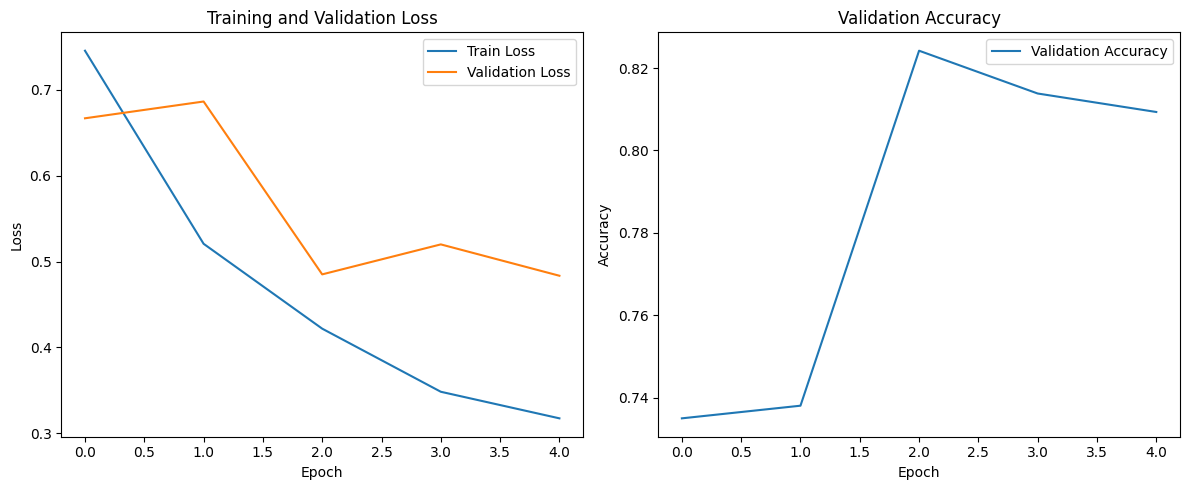

In [ ]:
#7.1 Μονάδα με παραλειπόμενες συνδέσεις BONUS


import torch
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
# from COVID19Dataset import COVID19Dataset
# from ex2 import train_one_epoch, tes

# Συναρτήσεις μετασχηματισμού δεδομένων
transformation = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Αλλαγή σε 3 κανάλια
    transforms.Resize((224, 224)),               # Αλλαγή μεγέθους εικόνας
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Κανονικοποίηση
])

# Δημιουργία του dataset
DATASET = COVID19Dataset(root_dir='/content/COVID19Dataset', transform=transformation)

# Διαχωρισμός του dataset σε training, validation και test σύμφωνα και με τισ προηγούμενες υλοποιησεισ
generator = torch.Generator().manual_seed(42)
train_ds, val_ds, test_ds = random_split(DATASET, [0.6, 0.2, 0.2], generator=generator)

# Δημιουργία dataLoaders
trainloader = DataLoader(train_ds, batch_size=64, shuffle=True)
valloader = DataLoader(val_ds, batch_size=64, shuffle=False)
testloader = DataLoader(test_ds, batch_size=64, shuffle=False)

# Ρύθμιση συσκευής
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Επίπεδο 1( 2 διαδοχικά συνελικτικά επίπεδα με 32 φίλτρα 3x3 και ReLU)
class BasicBlock(nn.Module):
    def __init__(self, n_in, n_filters, stride=1):
        super(BasicBlock, self).__init__()
        #Το padding το χρησιμοποιούμε για να εξασφαλίσει ότι οι διαστάσεις εξόδου παραμένουν οι ίδιες εάν το stride είναι 1//bias=False: Το bias το παραλείπουμε καθώς θα χρησιμοποιηθεί κανονικοποίηση
        self.conv1 = nn.Conv2d(n_in, n_filters, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(n_filters)
        self.relu = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv2d(n_filters, n_filters, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(n_filters)


        #Αυτό εξασφαλίζει ότι η είσοδος  μπορεί να προστεθεί στην έξοδο  ακόμα και αν έχουν διαφορετικές διαστάσεις
        self.downsample = None
        if stride != 1 or n_in != n_filters:
            self.downsample = nn.Sequential(
                nn.Conv2d(n_in, n_filters, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(n_filters)
            )

    def forward(self, x):
        identity = x  # Διατηρούμε την αρχική είσοδο

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        # Αν υπάρχει downsample, εφαρμόζεται στην είσοδο
        if self.downsample is not None:
            identity = self.downsample(x) #Η αρχική identity προστίθεται στην έξοδο της δεύτερης συνελικτικής στρώσης

        out += identity  # Πρόσθεση με την είσοδο
        out = self.relu(out)

        return out


# Δημιουργία του μοντέλου
class ChestXRayModel(nn.Module):
    def __init__(self, num_classes):
        super(ChestXRayModel, self).__init__()

        self.layer1 = BasicBlock(3, 64, stride=1)
        self.layer2 = BasicBlock(64, 128, stride=2)
        self.layer3 = BasicBlock(128, 256, stride=2)
        self.layer4 = BasicBlock(256, 512, stride=2)

        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = nn.functional.avg_pool2d(x, kernel_size=x.size()[2:])  # Adaptive pooling
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)

        return x

# Αριθμός κατηγοριών
num_classes = len(DATASET.classes)

# Δημιουργία μοντέλου
model = ChestXRayModel(num_classes=num_classes).to(device)

# Υπερπαράμετροι
lr = 1e-4
epochs = 5
optimizer = optim.Adam(model.parameters(), lr=lr, betas=(0.9, 0.99)) #όπως και στα πρηγούμενα ερωτήματα
lossfn = nn.CrossEntropyLoss()

# Εκπαίδευση
train_losses, val_losses, val_accuracies = [], [], []
best_val_loss = float('inf')
early_stop_counter = 0

for epoch in range(epochs):
    model.train()
    train_loss, train_accuracy = train_one_epoch(model, trainloader, optimizer, lossfn, device)
    val_loss, val_accuracy, val_cm = test(model, valloader, lossfn, device, num_classes)

    print(f"Epoch {epoch + 1}/{epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy * 100:.2f}%")
    print(f"Confusion Matrix:\n{val_cm}")

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    #προσθέτουμε και εδω early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_cnn2_model.pth")
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= 5:
            print("Early stopping triggered.")
            break

# Φόρτωση του καλύτερου μοντέλου
model.load_state_dict(torch.load("best_cnn2_model.pth"))
test_loss, test_accuracy, test_cm = test(model, testloader, lossfn, device, num_classes)

# Τελική αξιολόγηση στο σύνολο δοκιμής
print("\nFinal Test Results:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Confusion Matrix:\n{test_cm}")

# Σχεδίαση γραφημάτωνν
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation Accuracy")

plt.tight_layout()
plt.show()

